#Heart Disease Dataset

- Description: Contains medical data (e.g., age, cholesterol, chest pain type) to predict the presence of heart disease.
- Why Use: Great for binary classification and feature analysis in healthcare.
- Source: UCI Machine Learning Repository.
- Use Case: Disease prediction, logistic regression, feature importance.

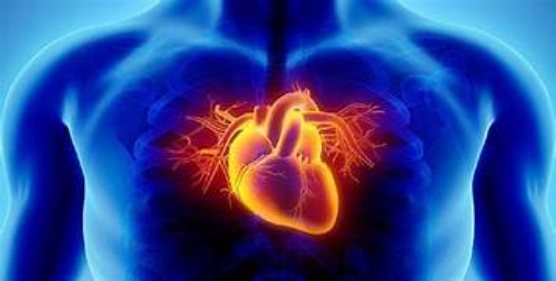

## DATA UNDERSTANDING

**Important parameters:**

* Number of instances: 303
* Number of attributes: 14 continuos attributes

**Each of the attributes:**
* age: Age in years
* sex: Sex(1= male, 0= female)
* cp: Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value3: non-aginal pain, Value 4: asymptomatic)
* trestbps: Resting blood pressure (in mmHg on admission to the hospital)
* chol: Serum Cholestoral in mg/dl
* fbs: fast blood sugar > 120 mg/dl (1= true, 0=false)
* restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or St elevation or depression of > 0.05mV, 2: showing probabal or definite left ventricular hypertrophy by Estes'criteria)
* thalach: Maximum heart rate achieved
* exang: Excercise included angina (1= yes, 0=no)
* oldpeak: ST depression indced by exercise relative to rest
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca : Number of major vessels (0-3) colored by flourosopy
* thal: 3= normal, 6= fixed defect, 7= reversable defect
* HeartDisease: Diagnosis of heart disease- angiprahic disease status  
  * Value 0: <50% diameter narrowing,
  * Value 1: > 50% diameter narrowing

in any major vessel: attributes 59 through 68 are vessels

## Step 1: Import Libraries & Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display plots inline
%matplotlib inline

# Define column names based on UCI documentation
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]


In [3]:
# Load the dataset
df = pd.read_csv('heart.csv', names=columns)

# Display the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


## Step 2: Initial Data Inspection

In [4]:
# View basic info of dataset
df.info()

# Check for '?' which indicates missing values
df.replace('?', np.nan, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       304 non-null    object
 1   sex       304 non-null    object
 2   cp        304 non-null    object
 3   trestbps  304 non-null    object
 4   chol      304 non-null    object
 5   fbs       304 non-null    object
 6   restecg   304 non-null    object
 7   thalach   304 non-null    object
 8   exang     304 non-null    object
 9   oldpeak   304 non-null    object
 10  slope     304 non-null    object
 11  ca        304 non-null    object
 12  thal      304 non-null    object
 13  target    304 non-null    object
dtypes: object(14)
memory usage: 33.4+ KB


Insight:
Some columns like ca and thal contain ?, which must be cleaned.



In [5]:
df.shape

(304, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Step 3: Handle Missing Values

In [7]:
# Convert applicable columns to numeric
df[['ca', 'thal']] = df[['ca', 'thal']].apply(pd.to_numeric, errors='coerce')

In [8]:
# Check how many missing values exist
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          1
thal        1
target      0
dtype: int64


In [9]:
# Drop rows with missing values
df = df.dropna()

In [10]:
# Reset index
df.reset_index(drop=True, inplace=True)


In [11]:
# Confirm shape after cleaning
print("Cleaned Data Shape:", df.shape)

Cleaned Data Shape: (303, 14)


Insight:
Only 6 rows are dropped. Now, we have clean, numeric data.

##  Step 4: Data Type Correction



In [12]:
# Convert all columns to appropriate types
df = df.astype({
    'age': 'float',
    'sex': 'int',
    'cp': 'int',
    'trestbps': 'float',
    'chol': 'float',
    'fbs': 'int',
    'restecg': 'int',
    'thalach': 'float',
    'exang': 'int',
    'oldpeak': 'float',
    'slope': 'int',
    'ca': 'int',
    'thal': 'int',
    'target': 'int'
})


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


## Step 5: Binary Classification Setup

In [14]:
# Convert target to binary: 0 = No disease, 1 = Disease (any level)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Check balance
df['target'].value_counts()


,count
target,
1,165
0,138


Insight:
The problem is now binary classification:

- 1 = Heart Disease

- 0 = No Heart Disease

## Step 6: Exploratory Data Analysis (EDA)
###6.1 Correlation Heatmap

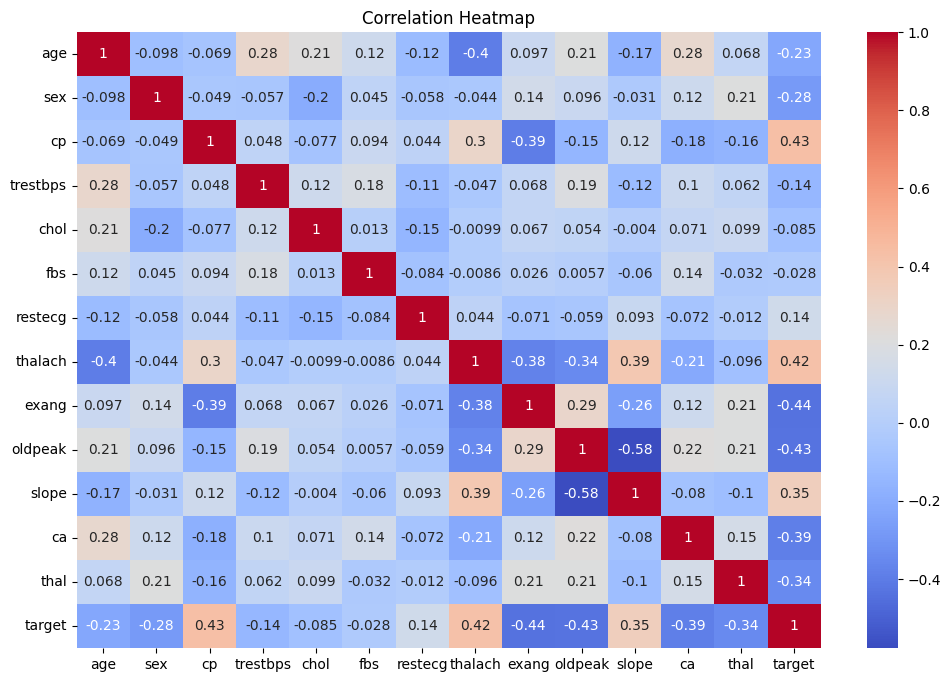

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Insight:

- cp (chest pain), thalach (max heart rate) are negatively correlated with disease.

- exang and oldpeak are positively correlated.

### 6.2 Target vs Chest Pain Type

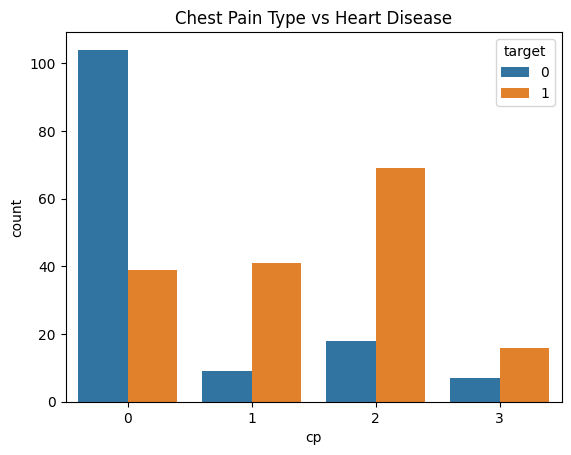

In [16]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()


Insight:

Type 1 chest pain is highly associated with disease.

Type 4 chest pain (asymptomatic) is a red flag.

### 6.3 Target vs Maximum Heart Rate (thalach)

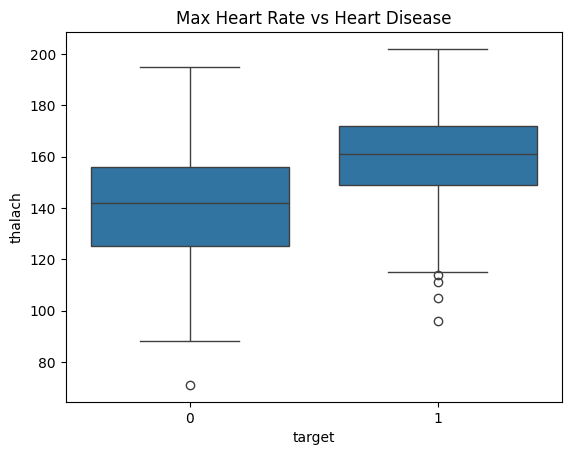

In [17]:
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()


Insight:
People with heart disease tend to have lower max heart rate.

## Step 7: Train Logistic Regression Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 8: Evaluate the Model

Accuracy: 0.8688524590163934


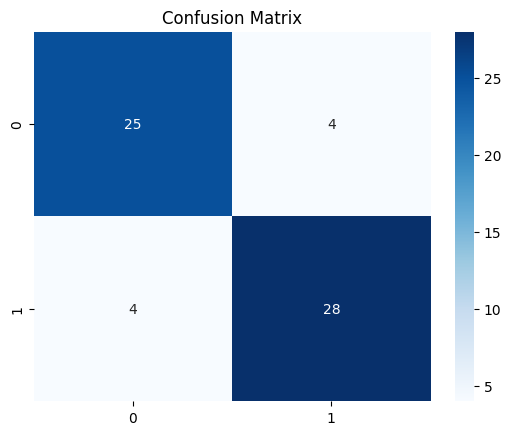

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [19]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


Insight:
The logistic regression model provides reasonable performance for this binary classification task. Precision and recall for detecting heart disease are critical here.

KNN Accuracy: 0.6885245901639344


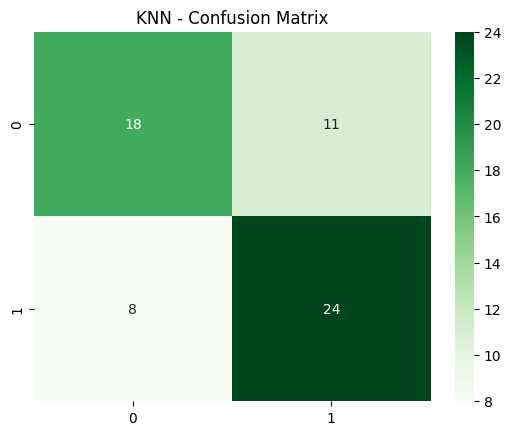

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [20]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Accuracy
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("KNN - Confusion Matrix")
plt.show()

# Classification Report
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))



Random Forest Accuracy: 0.8360655737704918


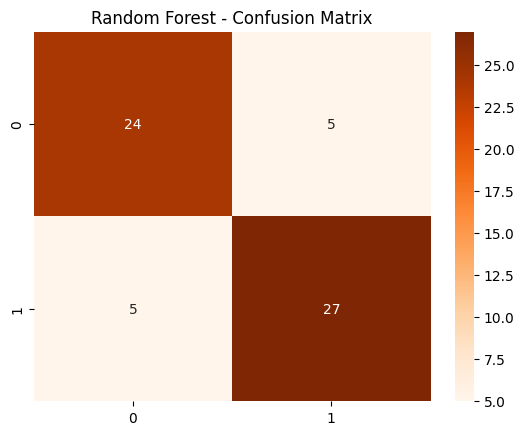

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [21]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Classification Report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


##  Step 9: Feature Importance

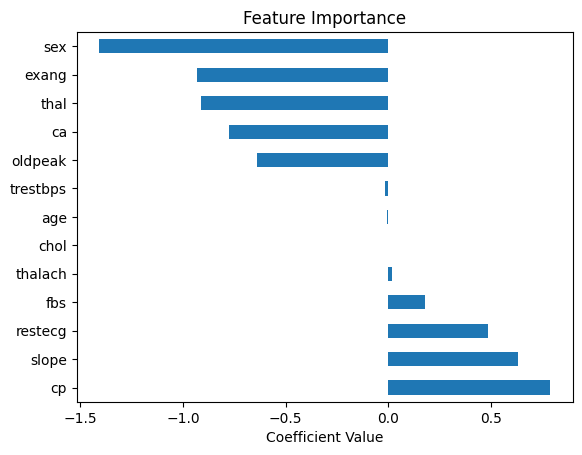

In [22]:
# Get feature importance from logistic regression coefficients
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

# Plot
feature_importance.plot(kind='barh', title="Feature Importance")
plt.xlabel("Coefficient Value")
plt.show()


Insight:

- cp, thal, and oldpeak are among the most influential features.

- Positive coefficients push prediction toward "disease", negative toward "no disease".